In [478]:
import csv
import numpy as np
import sklearn as sj
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from os import path
from matplotlib import pyplot
import IPython

header = []

match_information = {}

HOME_TEAM_INDEX = 2
AWAY_TEAM_INDEX = 3

matches = []

data = ['data/championship_18_19.csv', 'data/1.csv', 'data/2.csv', 'data/3.csv', 'data/4.csv', 'data/5.csv', 'data/6.csv', 'data/7.csv', 'data/8.csv', 'data/9.csv', 'data/pl_2014.csv', 'data/10.csv'] 
       
"""'data/11.csv', 'data/12.csv', 'data/13.csv', 'data/14.csv', 'data/15.csv', 'data/16.csv', 'data/17.csv', 
   'data/18.csv', 'data/19.csv', 'data/20.csv', 'data/21.csv', 'data/22.csv', 'data/23.csv', 'data/24.csv',
   'data/25.csv', 'data/26.csv', 'data/27.csv', 'data/28.csv', 'data/29.csv', 'data/30.csv', 'data/31.csv',
   'data/32.csv', 'data/33.csv']  """

def add_match(team, match):
    if team.lower() in match_information.keys():
        match_information[team.lower()].append(match)
    else:
        match_information[team.lower()] = [match]
        


def get_heading(path):
    with open(path, 'r') as csvfile:
        match_reader = csv.reader(csvfile)
        
        header = next(match_reader)

    # Generate the heading index map.
    return {heading: index for index, heading in enumerate(header)}

heading_index_map = get_heading(data[0])


def read_database(path, matches, match_information):
    with open(path, 'r') as csvfile:
        match_reader = csv.reader(csvfile)
    
        header = next(match_reader)

        for row in match_reader:

            temp_dict = {}

            flag = False
            

            # Loop through every row and add to the dictionary.
            for colno, data_item in enumerate(row):
                temp_dict[header[colno]] = data_item
                
            
                if not data_item:
            
                    flag = True
                    
            if flag:
                continue
             
     
            # Need to remove the bolton vs brentford match. This match did not take place.
            if temp_dict['HomeTeam'].lower() != 'bolton' or temp_dict['AwayTeam'].lower() != 'brentford':     
                # Add each match to both the home team and the away team.
                add_match(row[HOME_TEAM_INDEX], temp_dict)
                add_match(row[AWAY_TEAM_INDEX], temp_dict)

                # Each row represents a single match that has been played.
                matches.append(row)
                

        return (matches, match_information)
                
              

for data_item in data:
    matches, match_information = read_database(data_item, matches, match_information)
    
    
                


In [479]:
# Let's display all of the Leeds matches.https://stackoverflow.com/questions/9573244/how-to-check-if-the-string-is-empty

"""leeds_matches = match_information['leeds']

for match in leeds_matches:
    print("{home_team} {score_home} - {score_away} {away_team}".format(home_team = match['HomeTeam'],
                                                                       score_home = match['FTHG'],
                                                                       score_away = match['FTAG'],
                                                                       away_team = match['AwayTeam']))
                                                                       
                                                                       
"""

'leeds_matches = match_information[\'leeds\']\n\nfor match in leeds_matches:\n    print("{home_team} {score_home} - {score_away} {away_team}".format(home_team = match[\'HomeTeam\'],\n                                                                       score_home = match[\'FTHG\'],\n                                                                       score_away = match[\'FTAG\'],\n                                                                       away_team = match[\'AwayTeam\']))\n                                                                       \n                                                                       \n'

In [420]:
# Now I need a method which converts this information into a NumPy array.

# I want to see how much an influence a Referee has in the game. But I need to find all the unique referees.
# A set is the best way of achieving this.

referees_string = set([])
for team in match_information.values():
        for match in team:
            referees_string.add(match['Referee'])
            
# I probably won't use this but we shall see.
print("List of all the referees in the Championship: " + str(referees_string)) 

KeyError: 'Referee'

In [480]:
# Now I need to gather the information into a numpy array.
print(heading_index_map)

{'Div': 0, 'Date': 1, 'HomeTeam': 2, 'AwayTeam': 3, 'FTHG': 4, 'FTAG': 5, 'FTR': 6, 'HTHG': 7, 'HTAG': 8, 'HTR': 9, 'Referee': 10, 'HS': 11, 'AS': 12, 'HST': 13, 'AST': 14, 'HF': 15, 'AF': 16, 'HC': 17, 'AC': 18, 'HY': 19, 'AY': 20, 'HR': 21, 'AR': 22, 'B365H': 23, 'B365D': 24, 'B365A': 25, 'BWH': 26, 'BWD': 27, 'BWA': 28, 'IWH': 29, 'IWD': 30, 'IWA': 31, 'PSH': 32, 'PSD': 33, 'PSA': 34, 'WHH': 35, 'WHD': 36, 'WHA': 37, 'VCH': 38, 'VCD': 39, 'VCA': 40, 'Bb1X2': 41, 'BbMxH': 42, 'BbAvH': 43, 'BbMxD': 44, 'BbAvD': 45, 'BbMxA': 46, 'BbAvA': 47, 'BbOU': 48, 'BbMx>2.5': 49, 'BbAv>2.5': 50, 'BbMx<2.5': 51, 'BbAv<2.5': 52, 'BbAH': 53, 'BbAHh': 54, 'BbMxAHH': 55, 'BbAvAHH': 56, 'BbMxAHA': 57, 'BbAvAHA': 58, 'PSCH': 59, 'PSCD': 60, 'PSCA': 61}


In [537]:
# First of all there are three classes HomeWin, Draw, AwayWin.
y_classes = {0: 'HomeWin', 1: 'AwayWin', 2:'Draw'}

# Now we need to extract the relevant data from the matches list.
X = []
for match in matches:
    X.append((match[heading_index_map['HS'] : heading_index_map['B365A'] + 1]))
             
X = np.array(X)

X = X.astype(np.float)

print(X)

# Convert X so all elements are floats


X_copy = np.array(X, copy=True)

# Multiplying columns of X together.
# Iterate over the columns
for index, column in enumerate(X_copy.T):
    # Need to create new columns by multiplying two columns together.
    
    for mul_index in range(index, X_copy.shape[1]):
        new_col = np.multiply(X_copy[:, index], X_copy[:, mul_index])
        new_col = np.reshape(new_col, (-1,1))
        X = np.append(X, new_col, axis=1)

          
print(X.shape)

[[ 8.   11.    5.   ...  3.6   3.3   2.25]
 [16.   16.    7.   ...  2.6   3.3   3.  ]
 [14.    9.   10.   ...  1.5   4.75  7.  ]
 ...
 [10.   10.    3.   ...  1.44  4.75  8.5 ]
 [11.   17.    3.   ...  2.2   3.5   3.5 ]
 [17.   16.    8.   ...  2.25  3.75  3.2 ]]
(5445, 135)


In [538]:
# Now that we have produces X, we need to find the corresponding classes.
Y = []

for match in matches:
    # Get the final result.
    result = match[heading_index_map['FTR']]
    
    if result == 'H':
        Y.append(0)
    elif result == 'A':
        Y.append(1)
    else:
        Y.append(2)
        
Y = np.array(Y)

In [541]:
# We have the X and the Y we can now produce a model for the data.
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train)
print(y_train)

log_reg = LogisticRegression(max_iter=10000, C=100, penalty='l2', solver='liblinear').fit(X_train, y_train)

[[ 13.       6.       4.     ...  10.5625   7.735    5.6644]
 [ 14.       8.       1.     ...  12.25    14.      16.    ]
 [ 12.       8.       7.     ...  12.25    13.3     14.44  ]
 ...
 [ 14.       8.       4.     ...  11.56    11.05    10.5625]
 [ 12.       6.       2.     ...  30.25    82.5    225.    ]
 [ 18.       2.      10.     ...   4.84     7.48    11.56  ]]
[2 2 2 ... 0 0 1]


In [542]:
print("Training set score: {:.3f}".format(log_reg.score(X_train, y_train)))

Training set score: 0.591


In [543]:
print("Test set score: {:.3f}".format(log_reg.score(X_test, y_test)))

Test set score: 0.552


In [544]:
# Get the leeds wigan game.
print(X[505])

leeds_wigan = X[505]
print(leeds_wigan.shape)

leeds_wigan = np.reshape(leeds_wigan, (-1, 1))


log_reg.predict(leeds_wigan.T)



[ 16.       8.      10.       2.      11.       7.      15.       2.
   3.       3.       0.       1.       1.36     5.25     9.5    256.
 128.     160.      32.     176.     112.     240.      32.      48.
  48.       0.      16.      21.76    84.     152.      64.      80.
  16.      88.      56.     120.      16.      24.      24.       0.
   8.      10.88    42.      76.     100.      20.     110.      70.
 150.      20.      30.      30.       0.      10.      13.6     52.5
  95.       4.      22.      14.      30.       4.       6.       6.
   0.       2.       2.72    10.5     19.     121.      77.     165.
  22.      33.      33.       0.      11.      14.96    57.75   104.5
  49.     105.      14.      21.      21.       0.       7.       9.52
  36.75    66.5    225.      30.      45.      45.       0.      15.
  20.4     78.75   142.5      4.       6.       6.       0.       2.
   2.72    10.5     19.       9.       9.       0.       3.       4.08
  15.75    28.5      9.     

array([0])

In [510]:
print(y_classes[log_reg.predict(leeds_wigan.T)[0]])

log_reg.predict_proba(leeds_wigan.T)

HomeWin


array([[0.67876379, 0.22032576, 0.10091045]])

In [497]:
# Let's plot feature importance.
importance = log_reg.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
  


Feature: 0, Score: 0.00314
Feature: 1, Score: -0.07453
Feature: 2, Score: -0.47396
Feature: 3, Score: 0.35642
Feature: 4, Score: -0.06762
Feature: 5, Score: 0.03049
Feature: 6, Score: 0.11488
Feature: 7, Score: -0.18805
Feature: 8, Score: 0.46589
Feature: 9, Score: -0.90018
Feature: 10, Score: 4.07507
Feature: 11, Score: -1.52063
Feature: 12, Score: 0.52477
Feature: 13, Score: -1.87432
Feature: 14, Score: 0.30120
Feature: 15, Score: 0.00251
Feature: 16, Score: 0.00497
Feature: 17, Score: -0.00474
Feature: 18, Score: -0.00235
Feature: 19, Score: -0.00221
Feature: 20, Score: 0.00417
Feature: 21, Score: 0.00296
Feature: 22, Score: -0.00500
Feature: 23, Score: 0.00246
Feature: 24, Score: -0.01413
Feature: 25, Score: 0.20619
Feature: 26, Score: -0.05606
Feature: 27, Score: 0.04624
Feature: 28, Score: -0.06511
Feature: 29, Score: 0.02594
Feature: 30, Score: 0.00173
Feature: 31, Score: -0.01259
Feature: 32, Score: 0.00187
Feature: 33, Score: 0.00326
Feature: 34, Score: -0.00429
Feature: 35, S

[ 3.13777947e-03 -7.45283498e-02 -4.73955431e-01  3.56422438e-01
 -6.76162578e-02  3.04887484e-02  1.14877689e-01 -1.88052670e-01
  4.65890900e-01 -9.00184892e-01  4.07506530e+00 -1.52063406e+00
  5.24771110e-01 -1.87431822e+00  3.01203402e-01  2.51247586e-03
  4.97233091e-03 -4.74027812e-03 -2.34835291e-03 -2.20885200e-03
  4.17278573e-03  2.95942877e-03 -5.00123093e-03  2.46049373e-03
 -1.41338740e-02  2.06193642e-01 -5.60632762e-02  4.62382685e-02
 -6.51108835e-02  2.59405292e-02  1.72903827e-03 -1.25856383e-02
  1.87307479e-03  3.25703991e-03 -4.29315241e-03 -1.08085652e-03
 -2.77846210e-04 -1.37867938e-02 -1.42257305e-03  2.77649739e-02
 -4.58446902e-02 -2.10925040e-02  4.21986631e-02 -2.48894278e-02
  8.44896927e-03  3.14276582e-02 -6.08050020e-03 -4.04835622e-04
  1.15140580e-02  2.20605673e-03  9.63780395e-03  1.44107045e-02
 -2.47250041e-01  1.87977614e-01 -8.28452600e-02  1.43354471e-01
 -7.41240487e-02 -1.69139877e-02 -3.23125810e-04  7.88054490e-03
 -1.13914754e-02 -1.56270

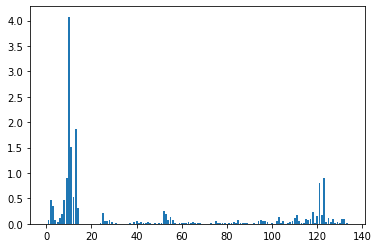

In [512]:
print(importance)

pyplot.bar([x for x in range(len(importance))], abs(importance))
plt.show()